<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(0, 5)

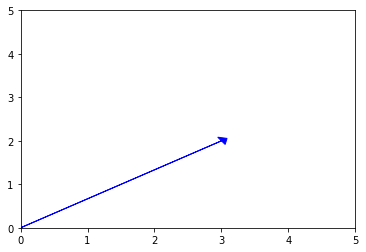

In [2]:
import matplotlib.pyplot as plt
import numpy as np

a = [3,2]

plt.arrow(0,0,a[0],a[1],head_width=.2,head_length=0.1,color='b')
plt.xlim(0,5)          
plt.ylim(0,5)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [4]:
# the norm is the length of the vector and is calculated by the root of the sum of the squares
b = np.array([17,-4,-2,1])
np.linalg.norm(b)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [7]:
E = np.matrix('7,4,2;1,3,-1;2,6,-4')
E

matrix([[ 7,  4,  2],
        [ 1,  3, -1],
        [ 2,  6, -4]])

In [9]:
#fidning transpose of E, i.e. rotating around the diagonal
E.T

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

In [10]:
#finding inverse of E, such that E.E-1=I
Einv = np.linalg.inv(E)
Einv

matrix([[ 0.17647059, -0.82352941,  0.29411765],
        [-0.05882353,  0.94117647, -0.26470588],
        [ 0.        ,  1.        , -0.5       ]])

In [13]:
#double checking
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.dot(E,Einv)

matrix([[1.00, 0.00, 0.00],
        [0.00, 1.00, 0.00],
        [0.00, -0.00, 1.00]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [45]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [18]:
#mean and std of customers and snow respectively is
mean_cust = df['customers'].mean()
std_cust = df['customers'].std()
mean_snow = df['snow'].mean()
std_snow = df['snow'].std()

mean_cust, std_cust, mean_snow, std_snow


(1135.7142857142858,
 314.26406851866597,
 2.7142857142857144,
 2.9277002188455996)

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#no they are not as they are not as they are from completely different ranges and types of data

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [20]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [47]:
#you can also find it like this
A = df.values
np.dot(A.T,A)

array([[9621500,   25600],
       [  25600,     103]])

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [21]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
df_std = df.set_index('Country')
for col in df_std.columns:
  df_std[col] = (df_std[col]-df_std[col].mean())/df_std[col].std()

In [0]:
#double checking
for col in df_std.columns:
  print(col,df_std[col].mean(),df_std[col].std())

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [30]:
from sklearn.decomposition import PCA
X = df_std.values
pca = PCA(2)
pca.fit(X)
pca.components_

array([[-0.25, 0.29, -0.26, -0.29, -0.13, -0.28, 0.10, -0.27, -0.29,
        -0.12, -0.26, -0.28, -0.18, -0.28, 0.23, -0.26, -0.25],
       [0.25, -0.08, 0.14, -0.01, -0.40, -0.14, -0.45, -0.10, -0.09,
        0.41, -0.15, 0.08, -0.33, -0.14, 0.29, 0.23, 0.21]])

In [31]:
pca.explained_variance_

array([11.62, 4.23])

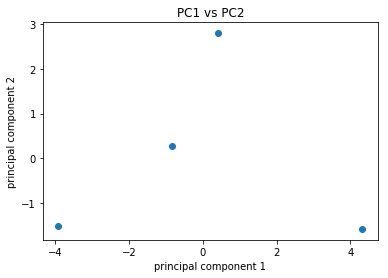

In [50]:
XT = pca.transform(X)
plt.scatter(XT[:,0],XT[:,1])

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PC1 vs PC2');


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [38]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


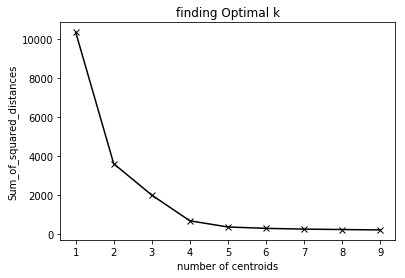

In [39]:
from sklearn.cluster import KMeans 
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'kx-')
plt.xlabel('number of centroids')
plt.ylabel('Sum_of_squared_distances')
plt.title('optimal k')
plt.show()

In [40]:
#looks like 4 is the optimal number of centroids so we calculate which cluster each point belongs to and attach to dataframe

n = 4
kmeans = KMeans(n_clusters=n)
kmeans.fit(points)
labels = kmeans.labels_
points['cluster'] = pd.Series(labels)
points.head()

,x,y,cluster
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


In [41]:
centroid_list = []
colors=['g','b','k','c']
for i in range (0,n):
  temp = (points[points['cluster']==i].mean()[0],points[points['cluster']==i].mean()[1],colors[i])
  centroid_list.append(temp)

centroid_list

[(-3.597406793888751, 4.133440993412572, 'g'),
 (-2.733593047683386, -8.204353041119228, 'b'),
 (6.249793180031626, 3.844571826521382, 'k'),
 (-8.366529866885651, -3.612380833929795, 'c')]

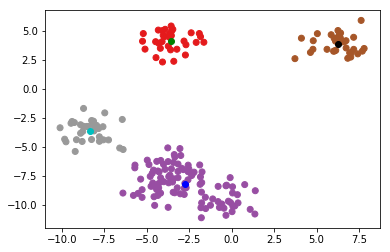

In [42]:
cm = plt.cm.get_cmap('Set1')
plt.scatter(points['x'],points['y'],c=points['cluster'],cmap=cm)


for j in range(0,n):
  plt.scatter(centroid_list[j][0],centroid_list[j][1],color=centroid_list[j][2])